# This script contains:
1. Import of Libraries and datasets
2. Data Prep for regression analysis
3. Conducting regression analysis 
4. Preparing data for analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Command to directly display charts in the notebook without 'call' command
%matplotlib inline

In [4]:
# Importing Dataset
df=pd.read_csv(r'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 6/Exercises/Dataset/gun_violence_wrangled',index_col=False)

In [5]:
df.head()

,incident_id,date,state,city/county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,latitude,longitude,n_guns_involved,age,age_group,gender,status,type,state_house_district,state_senate_district
0,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
1,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
2,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,1.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],...,34.9791,-106.7160,2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0
3,491674,2013-01-23,Tennessee,Chattanooga,1501 Dodds Ave,1,3,3.0,0::Unknown,0::Unknown,...,35.0221,-85.2697,1.0,0::19,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,28.0,10.0
4,479413,2013-01-25,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,1.0,0::Unknown,0::Unknown,...,38.7067,-90.2494,1.0,0::28,0::Adult 18+,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,76.0,4.0


In [6]:
df.shape

(45403, 21)

In [7]:
df.columns

Index(['incident_id', 'date', 'state', 'city/county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'age', 'age_group', 'gender', 'status', 'type', 'state_house_district',
       'state_senate_district'],
      dtype='object')

## 2. Data Prep for regression analysis

In [9]:
# Referencing relevant columns
columns=['date','state','n_killed','n_injured','age_group','gender','status']

In [10]:
#Making dataframe of the relevant columns
df_2=df[columns]

In [11]:
df_2.head()

,date,state,n_killed,n_injured,age_group,gender,status
0,2013-01-01,Ohio,1,3,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A..."
1,2013-01-07,North Carolina,2,2,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed
2,2013-01-19,New Mexico,5,0,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...
3,2013-01-23,Tennessee,1,3,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Killed||1::Injured||2::Injured||3::Injured
4,2013-01-25,Missouri,1,3,0::Adult 18+,0::Male,0::Killed||1::Injured||2::Injured||3::Injured


In [12]:
df_2.shape

(45403, 7)

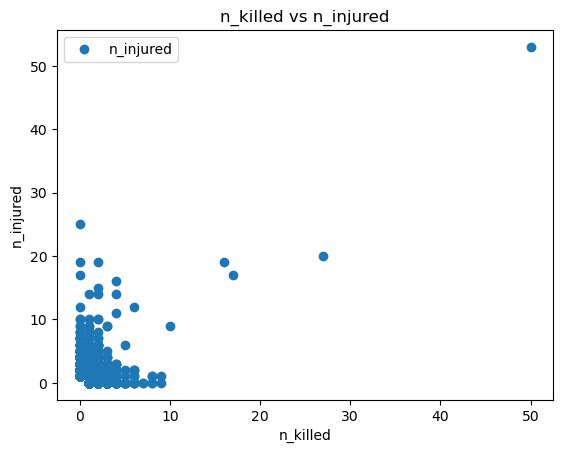

In [13]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_2.plot(x = 'n_killed', y='n_injured',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('n_killed vs n_injured')  
plt.xlabel('n_killed')  
plt.ylabel('n_injured')  
plt.show()

According to this scatterplot, the relation between number of people killed and no. of people injured from gun violence have negative linear relation. Except in some exceptional cases. Largely we can see that when the no. of people killed increased, the no. of people injured from the violence has decreased. 

In [15]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df_2['n_killed'].values.reshape(-1,1)
y = df_2['n_injured'].values.reshape(-1,1)

In [16]:
X

array([[1],
       [2],
       [5],
       ...,
       [0],
       [1],
       [2]])

In [17]:
y

array([[3],
       [2],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [18]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3. Conducting regression analysis

In [20]:
# Create a regression object.

regression = LinearRegression()

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

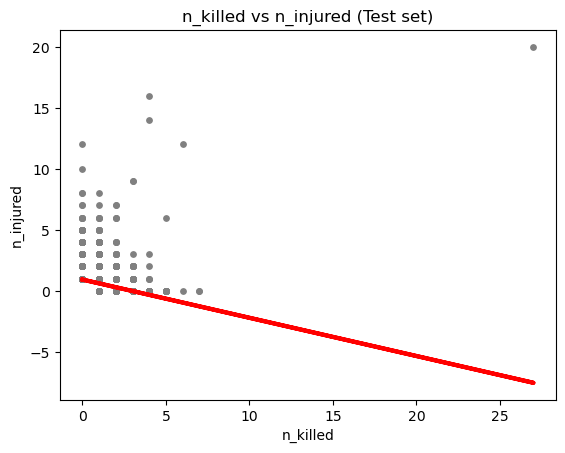

In [23]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('n_killed vs n_injured (Test set)')
plot_test.xlabel('n_killed')
plot_test.ylabel('n_injured')
plot_test.show()

In [24]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted)# This is the R2 score. 

In [25]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.31335697]]
Mean squared error:  0.5621887568465109
R2 score:  0.1311341743535458


In [26]:
y_predicted

array([[0.91453244],
       [0.91453244],
       [0.91453244],
       ...,
       [0.91453244],
       [0.60117546],
       [0.91453244]])

In [27]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.914532
1,2,0.914532
2,1,0.914532
3,0,0.601175
4,0,0.601175
5,1,0.914532
6,1,0.601175
7,1,0.914532
8,1,0.914532
9,1,0.601175


In [28]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.31335697]]
Mean squared error:  0.7170021893486337
R2 score:  0.0666709102368882


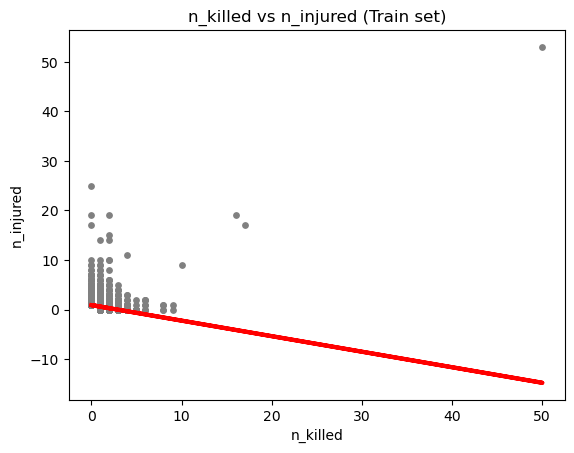

In [31]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('n_killed vs n_injured (Train set)')
plot_test.xlabel('n_killed')
plot_test.ylabel('n_injured')
plot_test.show()

The test sets result is replicated in the train set as well. Thus, validating the so large extent the no.of injuries is inversely proportional to the no.of killing. In this particular data set, the chances of possible data bias looks negligible. This analysis validate second hypothesis that low injuries does not necessarily comply that the incident recorded no fatalities.

## 4. Preparing data for further analysis to answer other research questions

In [34]:
df_2['date'].value_counts()

date
2017-01-01    123
2016-08-21    105
2016-08-28    104
2017-07-05    103
2017-06-11     97
             ... 
2013-10-13      1
2013-10-26      1
2013-10-27      1
2013-11-10      1
2013-01-01      1
Name: count, Length: 1622, dtype: int64

### Creating Year, Month and Day columns

In [36]:
#Spliting date column into three separate columns: year, month and day
df_2['date']=pd.to_datetime(df['date']) # Converting date to datetime format

df_2['year']=df_2['date'].dt.year # Extracting year into seperate columns
df_2['month']=df_2['date'].dt.month # Extracting month into seperate columns
df_2['day']=df_2['date'].dt.day # Extracting day into seperate columns 

/var/folders/38/3t8_0dvn1h950p6h5yqb56rm0000gn/T/ipykernel_44786/1492287912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['date']=pd.to_datetime(df['date']) # Converting date to datetime format
/var/folders/38/3t8_0dvn1h950p6h5yqb56rm0000gn/T/ipykernel_44786/1492287912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['year']=df_2['date'].dt.year # Extracting year into seperate columns
/var/folders/38/3t8_0dvn1h950p6h5yqb56rm0000gn/T/ipykernel_44786/1492287912.py:5: SettingWithCopyWarning:

In [37]:
# Checking no. of columns after creating news columns
df_2.columns

Index(['date', 'state', 'n_killed', 'n_injured', 'age_group', 'gender',
       'status', 'year', 'month', 'day'],
      dtype='object')

In [38]:
df_2.shape

(45403, 10)

In [39]:
df_2.head()

,date,state,n_killed,n_injured,age_group,gender,status,year,month,day
0,2013-01-01,Ohio,1,3,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",2013,1,1
1,2013-01-07,North Carolina,2,2,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,2013,1,7
2,2013-01-19,New Mexico,5,0,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,2013,1,19
3,2013-01-23,Tennessee,1,3,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Killed||1::Injured||2::Injured||3::Injured,2013,1,23
4,2013-01-25,Missouri,1,3,0::Adult 18+,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,2013,1,25


In [40]:
# Calculating change in gun violence injuries from 2013-2018
df_3=df_2.groupby('year').n_injured.sum().sort_values()

In [41]:
df_3

year
2013      233
2014     1272
2018     2853
2015     4368
2016     8886
2017    16153
Name: n_injured, dtype: int64

In [42]:
# Calculating change in gun violence death from 2013-2018
df_4=df_2.groupby('year').n_killed.sum().sort_values()

In [43]:
df_4

year
2013      132
2014     1526
2018     2419
2015     3185
2016     6053
2017    11322
Name: n_killed, dtype: int64

Text(0.5, 1.0, 'Gun Killing in the US, 2013-2018')

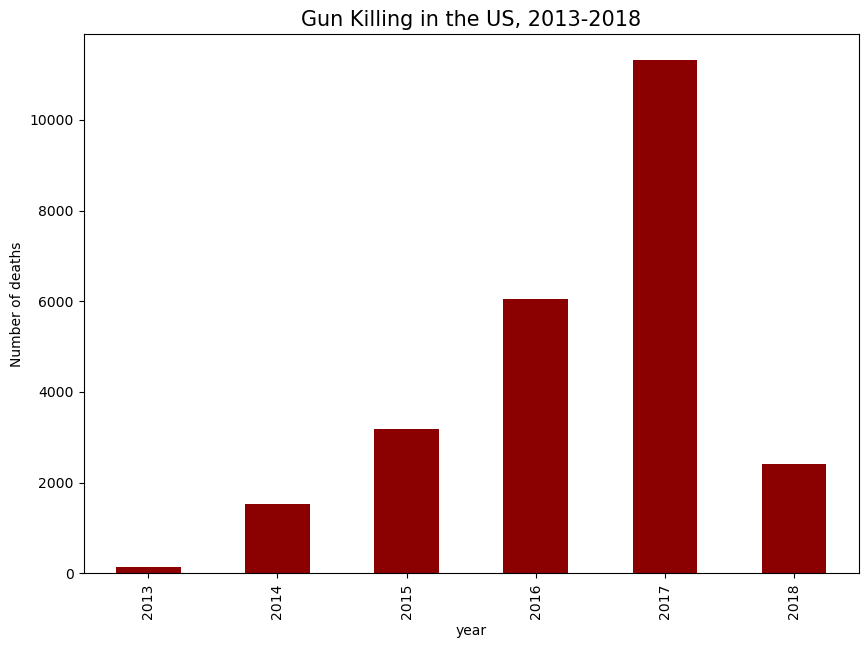

In [44]:
# Which year sees the highest number of death from gun violence?
df_2.groupby('year').n_killed.sum().plot(kind='bar', color='darkred', figsize=(10,7))
plt.ylabel('Number of deaths', fontsize=10)
plt.xlabel('year', fontsize=10)
plt.title('Gun Killing in the US, 2013-2018', fontsize=15)

Text(0.5, 1.0, 'Gun Injuries in the US, 2013-2018')

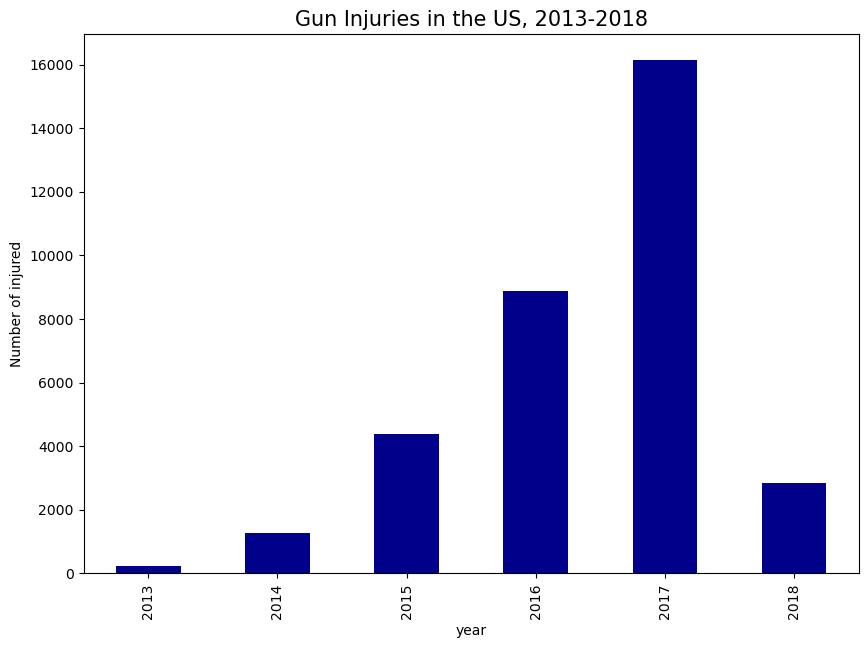

In [45]:
# Which year sees the highest number of injury from gun violence?
df_2.groupby('year').n_injured.sum().plot(kind='bar', color='darkblue', figsize=(10,7))
plt.ylabel('Number of injured', fontsize=10)
plt.xlabel('year', fontsize=10)
plt.title('Gun Injuries in the US, 2013-2018', fontsize=15)

Based on the above two graphs, it can be concluded that severity of gun death increased drastically from 2013 to 2017, with 2017 being the deadliest year. However, the violence did saw significant decrease in 2018. 

In [47]:
# Export of data
df_2.to_csv('gun_violence_year_on_year',index=False)